<a href="https://colab.research.google.com/github/erik-karasik/networkxgui/blob/main/networkx103M%D0%9A%D1%80%D0%B0%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_%D0%93%D0%BE%D0%BB%D0%BE%D0%B2%D0%B8%D0%B7%D0%BE%D0%B2_%D0%90%D1%80%D1%88%D0%B8%D0%BD%D0%BE%D0%B2_%D0%93%D1%83%D0%BA%D0%B0%D1%81%D1%8F%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
<h1><center>
МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ РФ

федеральное государственное бюджетное образовательное учреждение высшего образования

«Самарский государственный технический университет»

(ФГБОУ ВО «СамГТУ»)

Институт автоматики и информационных технологий
</h1></center>

<h1><center>
Кафедра «Вычислительная техника»



Дисциплина «Технологии мультисервисных сетей»



Отчёт о выполнении лабораторной работы  №1,2,3,4
на тему «Представление топологии сети в терминах теории графов»
</h1></center>

<left>Выполнили</left>  <right>Студенты гр. 1-ИАИТ-21ИАИТ-103М Красильников Э.В,
 Гукасян Д.В,
Головизов Д.И,
Аршинов Р.А</right>

<left>Проверил</left>   <right>к.т.н., доцент Гавлиевский  С.Л.</right>

<h1><center>
Самара 2022
</h1></center>

SyntaxError: ignored

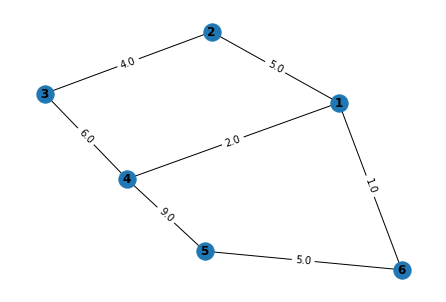

neighbors of 1 (3): ['2', '6', '4'] 

neighbors of 2 (2): ['1', '3'] 

neighbors of 3 (2): ['2', '4'] 

neighbors of 4 (3): ['3', '5', '1'] 

neighbors of 5 (2): ['4', '6'] 

neighbors of 6 (2): ['5', '1'] 

number of nodes: 6


KeyboardInterrupt: ignored

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image, ImageTk
from IPython.display import clear_output 
class Programm():
    def __init__(self):
        # Создадим экземпляр класса nx.Graph
        self.G = nx.Graph()
        self.nodesList = []
        self.edgesList = []
        self.weightList=[]
        self.pathList = []
        self.f = plt.Figure(figsize=(5, 5), dpi=100)
        self.widgets()

    def widgets(self):
        text="input tab\n\tpress 1 to add node(s)\n\tpress 2 to add edge(s)\n\tpress 3 to add weight(s)\n"+\
        "del tab\n\tpress 4 to del node(s)\n\tpress 5 to del edge(s)\n\tpress 6 to del weight(s)\n"+\
        "file tab\n\tpress 7 to load graph from file\n\tpress 8 to save graph to file\n"+\
        "path tab\n\tpress 9 to find Dijkstra path\n\tpress 10 to find BFS path\npress 11 to load demo graph\n"
        while True:
          command=int(input(text))
          if command==1:self.addNodes()
          elif command==2:self.addEdges()
          elif command==3:self.addWeight()
          elif command==4:self.removeNodes()
          elif command==5:self.removeEdges()
          elif command==6:self.removeWeights()
          elif command==7:self.loadGraph()
          elif command==8:self.saveGraph()
          elif command==9:self.path()
          elif command==10:self.pathBFS()
          elif command==11:self.test()

    def test(self):
        t=input('type 1 or 2 to see first or second variant of demo graph')
        if t=='1':
          self.addNodes('1 2 3 4 5 6'.split(' '))
          self.addEdges('1,2 2,3 3,4 4,5 5,6 6,1 1,4'.split(' '))
          self.addWeight('1,2,5 2,3,4 3,4,6 4,5,9 5,6,5 6,1,1 1,4,2'.split(' '))
        elif t=='2':
          self.addNodes('A B C D E F'.split(' '))
          self.addEdges('A,B B,C C,E E,D D,F F,A A,E'.split(' '))
          self.addWeight('A,B,5 B,C,4 C,E,6 E,D,9 D,F,5 F,A,1 A,E,2'.split(' '))
    def path(self):
        nodesList = input('type nodes separeted by space (in format \'1 2\')').split(" ")
        if self.checkNode(nodesList[0]) or self.checkNode(nodesList[1]): return False
        else:
            predecessors, _ = nx.floyd_warshall_predecessor_and_distance(self.G)
            self.pathList = nx.reconstruct_path(nodesList[0], nodesList[1], predecessors)
            self.vis()
    def pathBFS(self):
        nodesList = input('type nodes separeted by space (in format \'1 2\')').split(" ")
        if self.checkNode(nodesList[0]) or self.checkNode(nodesList[1]): return False
        else:
            explored=[]
            queue = [[nodesList[0]]]
            if nodesList[0] == nodesList[1]:
                self.addNodesBox.insert(0, "same nodes")
                return
            while queue:
                path = queue.pop(0)
                node = path[-1]
                if node not in explored:
                    neighbours = self.G[node]
                    for neighbour in neighbours:
                        new_path = list(path)
                        new_path.append(neighbour)
                        queue.append(new_path)
                        if neighbour == nodesList[1]:
                            self.pathList = [str(i) for i in new_path]
                            self.vis()
                            return
                    explored.append(node)
            return
    def saveGraph(self):
        with open('saved.txt', 'w') as writefile:
          writefile.write(str(self.nodesList))
          writefile.write(str(self.edgesList))
    def loadGraph(self):
        with open('saved.txt') as file:
          lines = [line.rstrip() for line in file]
        self.G.remove_edges_from(self.edgesList)
        self.G.remove_nodes_from(self.nodesList)
        for i in lines[0]:
            if self.checkNode(i):
                self.G.add_node(i)
                self.nodesList.append(i)
        for i in lines[1]:
            if self.checkEdge(i):
                self.G.add_edge(i[0],i[1])
                self.edgesList.append(i)
        self.vis()
    def vis(self):
        clear_output()
        plt.figure()
        if len(self.weightList)==0: nx.draw_circular(self.G, node_color='red', node_size=1000, with_labels=True)
        elif len(self.pathList)==0:
            wei=nx.get_edge_attributes(self.G,'weight')
            pos = nx.spring_layout(self.G)
            nx.draw(self.G,pos,with_labels=True,font_weight='bold')
            nx.draw_networkx_edge_labels(self.G,pos,edge_labels=wei)
        else:
            edges = [(a, b) for a, b in zip(self.pathList, self.pathList[1:])]
            weights = nx.get_edge_attributes(self.G, 'weight')
            pos = nx.circular_layout(self.G)
            nx.draw_networkx(self.G, pos=pos)
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
            nx.draw_networkx_edges(self.G, pos=pos, edgelist=edges, edge_color="r", width=3)
            title = "Shortest path between [{}] and [{}]: {}" \
                .format("s", "v", " -> ".join(self.pathList))
        plt.show()
        notes = self.G.nodes(data=False)
        for i in notes:
            nei = [n for n in self.G.neighbors(i)]
            print(f'neighbors of {i} ({len(nei)}): {nei} \n')
        print(f"number of nodes: {len(notes)}")
    def checkNode(self,node): return node != '' and node != " " and node not in self.nodesList
    def checkEdge(self,edge): return len(edge) == 2 and (edge not in self.edgesList or (edge[1], edge[0]) not in self.edgesList) and edge[0] in self.nodesList and edge[1] in self.nodesList
    def checkWEdge(self,edge): return ((edge[0],edge[1]) in self.edgesList or (edge[1], edge[0]) in self.edgesList)
    def addNodes(self,nodesList=''):
        if nodesList == '':
          nodesList = input('type nodes separeted by space (in format \'1 2\')').split(" ")
        for i in nodesList[:]:
            if self.checkNode(i):self.nodesList.append(i)
            else: nodesList.remove(i)
        if len(self.nodesList): self.G.add_nodes_from(nodesList)
        self.vis()
    def addEdges(self,edgesList=''):
        if edgesList=='':
          edgesList = input('type nodes separeted by coma (in format \'1,2 2,3\')').split(" ")
        edgeList = []
        for i in edgesList[:]:
            edge = tuple(i.split(","))
            if self.checkEdge(edge):
                self.edgesList.append(edge)
                edgeList.append(edge)
            else: edgesList.remove(i)
        if len(edgeList): self.G.add_edges_from(edgeList)
        self.vis()
    def addWeight(self,weightsList=''):
        if weightsList=='':
          weightsList=input('type edges and weight separeted by coma (in format \'1,2,0.1 2,3,0.9\')').split(" ")
        weightList=[]
        for i in weightsList[:]:
            edge = tuple(i.split(","))
            if (edge[0],edge[1],float(edge[2])) not in self.weightList and \
                    (edge[1], edge[0], float(edge[2])) not in self.weightList:
                if self.checkEdge((edge[0],edge[1])):
                    self.weightList.append((edge[0],edge[1],float(edge[2])))
                    weightList.append((edge[0],edge[1],float(edge[2])))
                    self.edgesList.append((edge[0],edge[1]))
                elif self.checkWEdge(edge):
                    self.removeEdge((edge[0],edge[1]))
                    self.weightList.append((edge[0],edge[1],float(edge[2])))
                    weightList.append((edge[0],edge[1],float(edge[2])))
                    self.edgesList.append((edge[0],edge[1]))
        if len(weightList): self.G.add_weighted_edges_from(weightList)
        self.vis()
    def removeNode(self,nodeIndex):
        self.G.remove_node(nodeIndex)
        self.vis()
    def removeNodes(self):
        nodesList = input('type nodes separeted by space (in format \'1 2\')').split(" ")
        for i in nodesList[:]:
            if i == '' or i == " " or i not in self.nodesList: nodesList.remove(i)
            else: self.nodesList.remove(i)
        if len(nodesList)>0:
            self.G.remove_nodes_from(nodesList)
        self.vis()
    def removeEdge(self, edge):
        if edge in self.edgesList: self.edgesList.remove(edge)
        else: self.edgesList.remove((edge[1], edge[0]))
        self.G.remove_edge(edge[0],edge[1])
    def removeEdges(self):
        edgesList = input('type edges separeted by space (in format \'1,2 2,3\')').split(" ")
        edgeList = []
        for i in edgesList[:]:
            edge = tuple(i.split(","))
            if edge not in self.edgesList and (edge[1], edge[0]) not in self.edgesList: edgesList.remove(i)
            elif edge[0] not in self.nodesList or edge[1] not in self.nodesList: edgesList.remove(i)
            else:
                if edge in self.edgesList: self.edgesList.remove(edge)
                else: self.edgesList.remove((edge[1], edge[0]))
                edgeList.append(edge)
        if len(edgeList): self.G.remove_edges_from(edgeList)
        self.vis()
    def removeWeights(self):
        edgesList = input('type edge separeted by space (in format \'1,2 2,3\')').split(" ")
        edgeList = []
        print(self.edgesList,self.weightList)
        for i in edgesList[:]:
            edge = tuple(i.split(","))
            flag=False
            for j in self.weightList[:]:
                if edge==(j[0],j[1]) or edge==(j[1],j[0]):
                    self.weightList.remove(j)
                    flag=True
            if flag:
                if (edge[0],edge[1]) in self.edgesList:self.edgesList.remove((edge[0],edge[1]))
                else: self.edgesList.remove((edge[1],edge[0]))
                edgeList.append(edge)
        if len(edgeList):self.G.remove_edges_from(edgeList)
        self.vis()

if __name__=='__main__':
    app = Programm()